# Lecture 5 Examples
## By James Camacho

In [2]:
# Imports
import numpy as np
import scipy

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
import matplotlib.animation as animation
from IPython.display import HTML

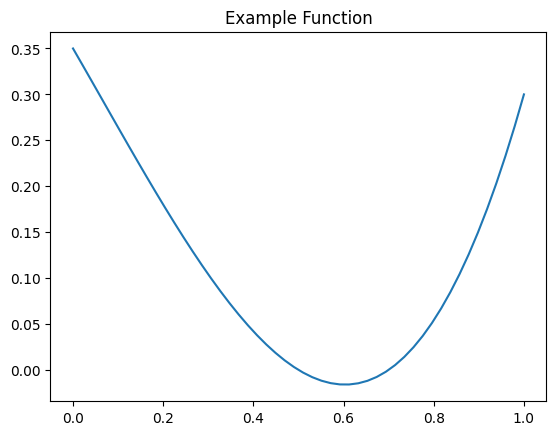

In [3]:
# Line Search, Example Function

def f(x):
    return (x-.5)*(x-.7)*(x+1)

plt.title("Example Function")
x = np.linspace(0, 1)
plt.plot(x, f(x))
plt.show()

In [4]:
# Binary Search

x1, x2 = 0, 1
f1, f2 = f(x1), f(x2)
iters = 0
while f1 - f2 > 1e-10:
    iters += 1
    x_ = (x1+x2)/2
    f_ = f(x_)
    if f_ > 0:
        x1, f1 = x_, f_
    else:
        x2, f2 = x_, f_
        
print(f"Took {iters} iterations to find the root {x1:.5f}.")

Took 32 iterations to find the root 0.50000.


In [5]:
# Golden-Section Search

phi = (1+5**.5)/2
x1, x2, x3, x4 = 0, 2-phi, phi-1, 1
f1, f2, f3, f4 = f(x1), f(x2), f(x3), f(x4)
iters = 0

while x3 - x2 > 1e-10:
    iters += 1
    if f3 > f2:
        x1, x2, x3, x4 = x1, (2-phi)*x1 + (phi-1)*x2, x2, x3
        f1, f2, f3, f4 = f1, f(x2), f2, f3
    else:
        x1, x2, x3, x4 = x2, x3, (2-phi)*x3 + (phi-1)*x4, x4
        f1, f2, f3, f4 = f2, f3, f(x3), f4
        

print(f"Took {iters} iterations to find the minimum {(x2+x3)/2:.5f}.")

Took 50 iterations to find the minimum 0.60312.


In [6]:
# Simplex Method - Catan

c = [1, 1, 1]
A = [[0, 0, 1],
     [0, 1, 1],
     [2, 1, 1],
     [3, 1, 0],
     [0, 0, 1]
    ]

b = [
     [2], # lumber
     [2], # sheep
     [5], # wheat
     [4], # ore
     [2], # brick
    ]

I = np.identity(len(A))
zeros = [0] * (len(A) + 1)

T = np.r_[
          [-np.r_[c, zeros]],
          np.c_[A, I, b],
         ]

while True:
    for j in range(len(T[0])):
        if T[0, j] < 0:
            break
    
    else: # No positive values in the objective row.
        break
    
    best = None
    idx = 0
    for i in range(1, len(T)):
        if T[i, j] > 0:
            if best is None or T[i, -1] / T[i, j] < best:
                idx = i
                best = T[i, -1] / T[i, j]
    
    for i in range(len(T)):
        if i == idx: continue
        T[i] -= T[idx] * T[i, j] / T[idx, j]

print("For resources " + ", ".join(f"{b[i][0]} {r}" 
        for i, r in enumerate(["lumber", "sheep", "wheat", "ore", "brick"])), end=", ")
        
print(f"the maximum number of victory points is {T[0, -1]:.2f}.")
print("Achieved with:")

for j, name in enumerate(["cities", "cards", "settlements"]):
    if T[0, j] == 0:
        for i in range(1, len(T)):
            if T[i, j] != 0:
                print(f"{T[i, -1] / T[i, j] :.2f} {name}")
                break
                
# You won't necessarily get integer values--that would be an NP-hard problem!

For resources 2 lumber, 2 sheep, 5 wheat, 4 ore, 2 brick, the maximum number of victory points is 3.33.
Achieved with:
1.33 cities
0.00 cards
2.00 settlements


In [6]:
# Conjugate Gradient Method
# https://en.wikipedia.org/wiki/Conjugate_gradient_method

def solve(A, b, x=0, iters=5):
    x = 0
    r = np.copy(b)
    p = np.copy(b)
    for i in range(iters):
        r_prev = np.copy(r)
        a = (r @ r) / (p @ (A @ p))
        x += a * p
        r -= a * (A @ p)
        p = r + (r @ r) / (r_prev @ r_prev) * p
        
    return x

A = np.array([[1, 2],
              [2, 5]])
b = np.array([2., 3.])
x = solve(A, b)
print(x)

[ 4. -1.]


In [7]:
# Using it for the Crank-Nicolson method

def laplacian(u):
    # Dirichlet boundaries
    u = np.pad(u, 1)
    
    # 5-point stencil.
    return u[2:,1:-1]+u[:-2,1:-1]+u[1:-1,2:]+u[1:-1,:-2]-4*u[1:-1,1:-1]

def trapezoid(u, dt, conjugate_iters=50):
    def A(x):
        return x - dt*laplacian(x)/2
    
    b = u + dt*laplacian(u)/2
    u += dt * laplacian(u) # forward Euler for initial guess.
    r = b - A(u)
    p = np.copy(b)
    for i in range(conjugate_iters):
        r_prev = np.copy(r)
        a = np.sum(r*r) / np.sum(p*A(p))
        u += a * p
        r -= a * A(p)
        p = r + np.sum(r*r) / np.sum(r_prev*r_prev) * p
        
    return u

N = 20
u = np.zeros((N, N))
u[[0, -1], :] += 1
u[:, [0, -1]] -= 1
dt = 1e-2

fig = plt.figure()
im = plt.imshow(u, animated=True, cmap="coolwarm")
im.set_clim(-1, 1)
plt.colorbar()

def updatefig(*args):
    global u
    u = trapezoid(u, dt)
    
    im.set_array(u)
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=200, interval=25, blit=False, repeat=False)

html_video = HTML(ani.to_jshtml())
plt.close()
display(html_video)

# Adam?

See https://github.com/programjames/nn_from_scratch/blob/main/NN_from_scratch.ipynb.